In [78]:
from pathlib import Path
from scipy.stats import pearsonr
import numpy as np

import matplotlib.pyplot as plt

import uncertainties as unc
import dataloaders as dl
import models as m
num=10000
batch_size = 200
test_num=2000
device='cuda:0'
data_loader_train, data_loader_test, data_loader_train_r, data_loader_test_r = dl.get_dataloaders(num, batch_size)
contextual_data_loader = dl.get_dataloaders_c(test_num, batch_size)

classifier = m.Classifier(data_loader_train, data_loader_test, device)
accuracies = classifier.train_and_eval()
preds = classifier.pred(contextual_data_loader)
dropout_var, dropout_mean, dropout_raw_var = unc.get_preds_dropout(contextual_data_loader, classifier.model, device)
laplace_var, laplace_mean = unc.get_preds_laplace(data_loader_train, contextual_data_loader, classifier.model, device)
dists=[]
for X, y in contextual_data_loader:
    dists.extend([dl.projection_distance(x.numpy()) for x in X])
def entropy(x):
    return x*np.log2(x) + (1-x)*np.log2(1-x)
values = [preds, entropy(preds), laplace_mean, entropy(laplace_mean), dropout_mean, entropy(dropout_mean), laplace_var, dropout_var, dropout_raw_var]

Classifier learn has finished with acc: 0.856
Test acc: 0.844


In [79]:
def plot_histograms(arr, idx, arr2=None):
    if arr2 is None:
        fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), sharex=True)
        ax1.hist(arr[idx])
        ax2.hist(arr)
    else:
        fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2, figsize=(10,10), sharex="col")
        ax1.hist(arr[idx])
        ax2.hist(arr)
        ax3.hist(arr2[idx])
        ax4.hist(arr2)
                

## Niepewność błędnie zaklasyfikowanych

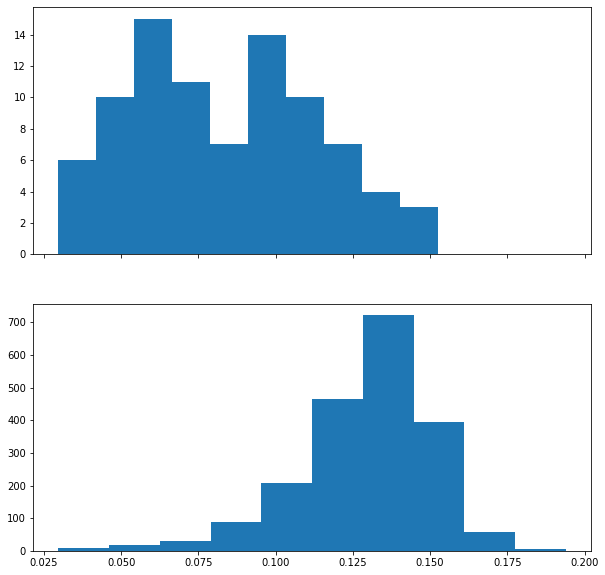

In [80]:
idx = np.where(preds<0.5)[0]
plot_histograms(dropout_var, idx)

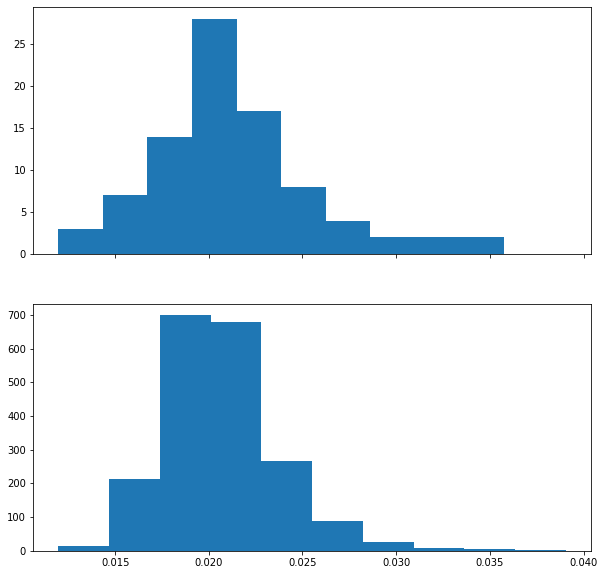

In [81]:
plot_histograms(laplace_var, idx)

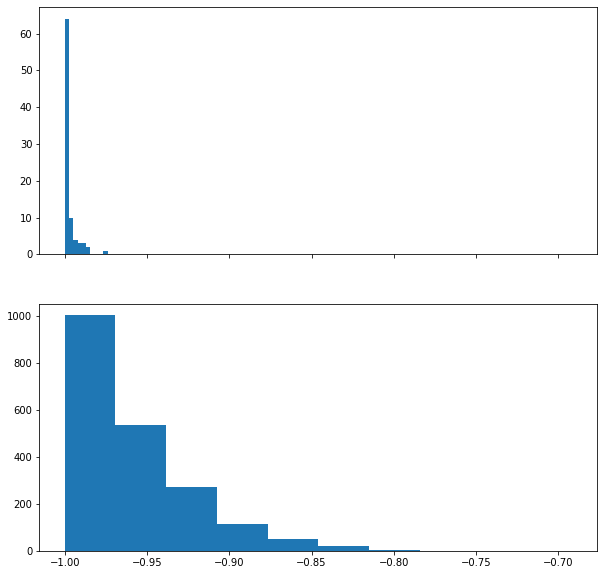

In [82]:
plot_histograms(entropy(preds), idx)

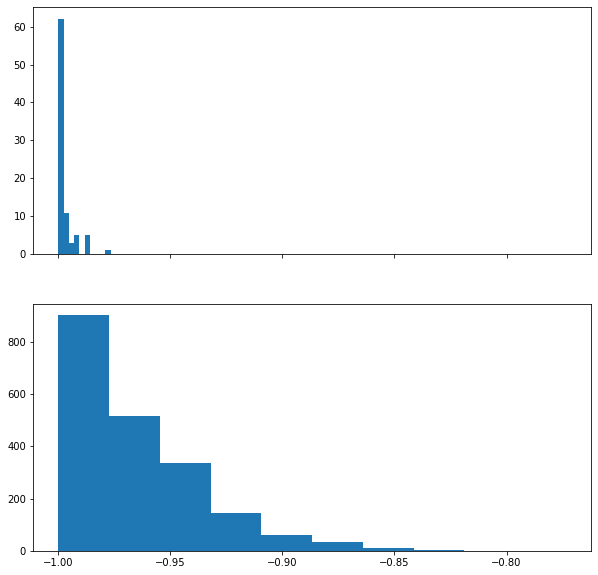

In [83]:
plot_histograms(entropy(dropout_mean), idx)

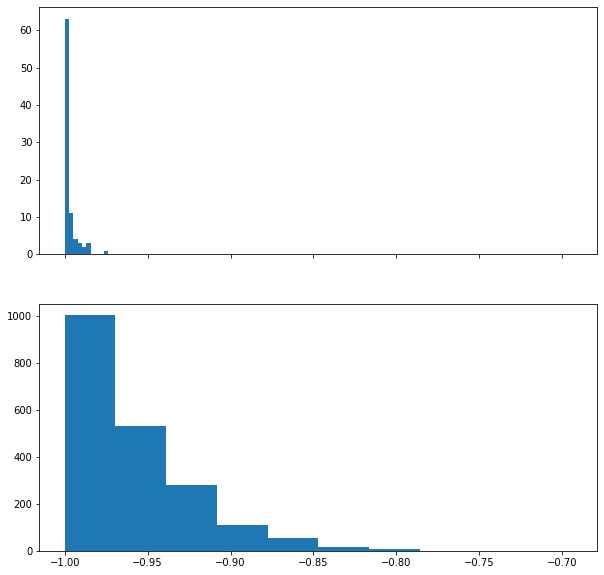

In [84]:
plot_histograms(entropy(laplace_mean), idx)

# Niepewność tak samo odległych

(array([911., 503., 279., 160.,  80.,  38.,  16.,   6.,   3.,   4.]),
 array([3.56161745e-05, 2.58189481e-02, 5.16022801e-02, 7.73856120e-02,
        1.03168944e-01, 1.28952276e-01, 1.54735608e-01, 1.80518940e-01,
        2.06302272e-01, 2.32085604e-01, 2.57868936e-01]),
 <BarContainer object of 10 artists>)

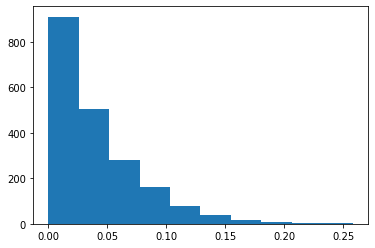

In [85]:
plt.hist(dists)

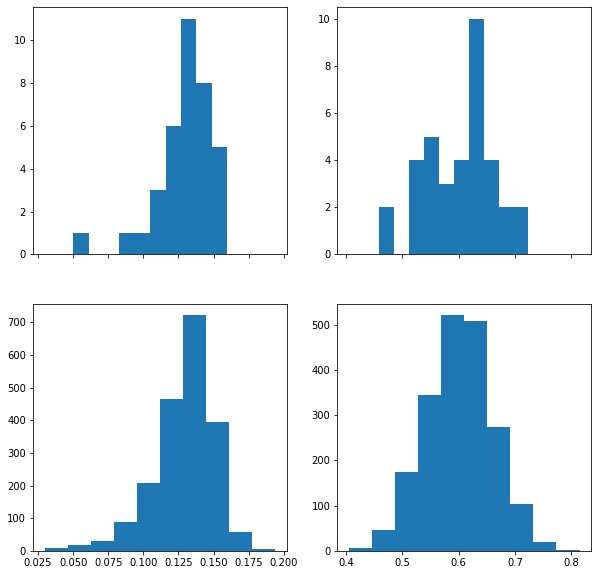

In [86]:
idx = np.where(np.abs(np.array(dists)-0.05) < 0.001)
plot_histograms(dropout_var, idx, preds)

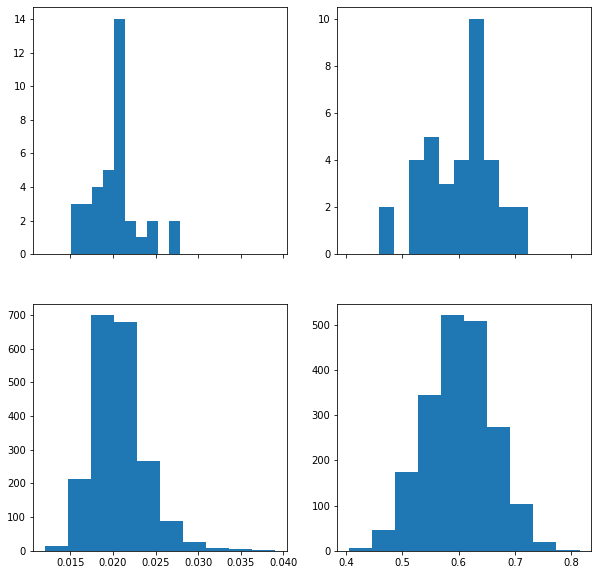

In [92]:
plot_histograms(laplace_var, idx, preds)

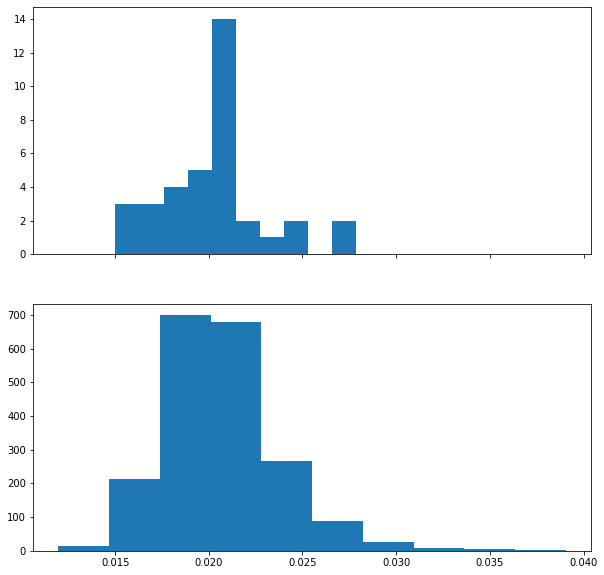

In [88]:
plot_histograms(laplace_var, idx)

(array([ 6.,  8., 20., 16., 21., 12.,  4.,  5.,  0.,  1.]),
 array([0.12995538, 0.13635156, 0.14274773, 0.14914392, 0.1555401 ,
        0.16193627, 0.16833244, 0.17472862, 0.1811248 , 0.18752098,
        0.19391716], dtype=float32),
 <BarContainer object of 10 artists>)

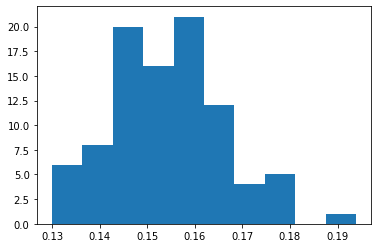

In [89]:
plt.hist(dropout_var[np.where(preds>0.7)[0]])

(array([  9.,  17.,  29.,  89., 209., 465., 721., 396.,  59.,   6.]),
 array([0.02970499, 0.04612621, 0.06254742, 0.07896864, 0.09538986,
        0.11181107, 0.12823229, 0.1446535 , 0.16107473, 0.17749594,
        0.19391716], dtype=float32),
 <BarContainer object of 10 artists>)

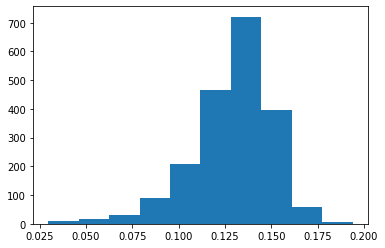

In [90]:
plt.hist(dropout_var)

(array([911., 503., 279., 160.,  80.,  38.,  16.,   6.,   3.,   4.]),
 array([3.56161745e-05, 2.58189481e-02, 5.16022801e-02, 7.73856120e-02,
        1.03168944e-01, 1.28952276e-01, 1.54735608e-01, 1.80518940e-01,
        2.06302272e-01, 2.32085604e-01, 2.57868936e-01]),
 <BarContainer object of 10 artists>)

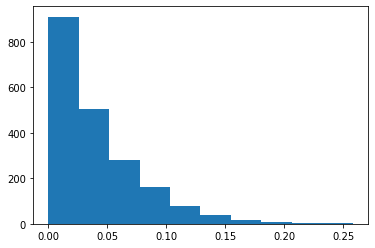

In [91]:
plt.hist(dists)

In [26]:
idx = np.where(np.abs(np.array(dists)-0.05) < 0.001)

(array([ 35., 145.,  55., 109., 243., 475., 580., 287.,  64.,   7.]),
 array([0.00343742, 0.02113832, 0.03883922, 0.05654012, 0.07424102,
        0.09194192, 0.10964282, 0.12734371, 0.14504462, 0.16274552,
        0.18044642], dtype=float32),
 <BarContainer object of 10 artists>)

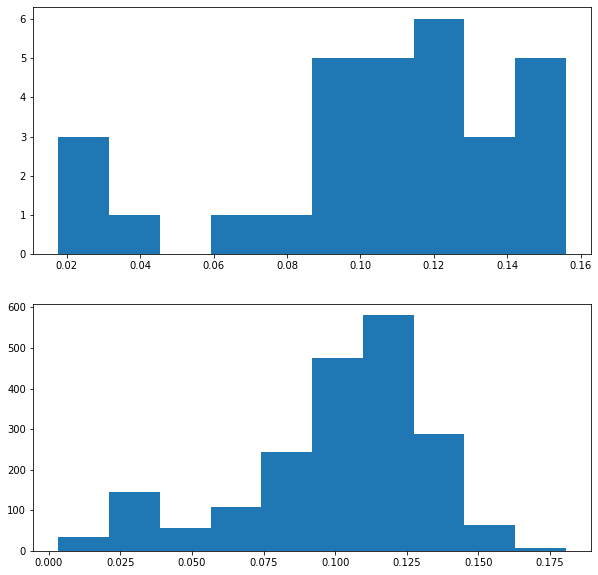

In [38]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))
ax1.hist(dropout_var[idx])
ax2.hist(dropout_var)

(array([ 50., 416., 758., 486., 181.,  70.,  26.,   9.,   3.,   1.]),
 array([0.01092789, 0.01441906, 0.01791023, 0.0214014 , 0.02489258,
        0.02838375, 0.03187492, 0.03536609, 0.03885726, 0.04234844,
        0.04583961], dtype=float32),
 <BarContainer object of 10 artists>)

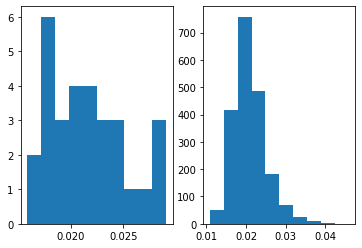

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(laplace_var[idx])
ax2.hist(laplace_var)